# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1512]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_merged_data = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_merged_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [1513]:
# Checking the number of mice.
number_of_mice = mouse_merged_data["Mouse ID"].unique()
number_of_mice = len(number_of_mice)
number_of_mice

249

In [1514]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_merge_duplicates = mouse_merged_data[mouse_merged_data.duplicated(subset=["Mouse ID","Timepoint"])]
mouse_merge_duplicates = mouse_merge_duplicates["Mouse ID"].unique()
mouse_merge_duplicates


array(['g989'], dtype=object)

In [1515]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_merge_duplicates = mouse_merged_data[mouse_merged_data.duplicated(subset=["Mouse ID","Timepoint"])]
mouse_merge_duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [1516]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_merge_unique_df = mouse_merged_data.drop_duplicates(subset=["Mouse ID"])
mouse_merge_unique_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [1517]:
# Checking the number of mice in the clean DataFrame.
number_of_mice = mouse_merge_unique_df["Mouse ID"].count()
number_of_mice

249

## Summary Statistics

In [1518]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_regimen_summary = mouse_merged_data.groupby(["Drug Regimen"])

drug_regimen_df = pd.DataFrame([drug_regimen_summary["Tumor Volume (mm3)"].mean(),
                                drug_regimen_summary["Tumor Volume (mm3)"].median(),
                                drug_regimen_summary["Tumor Volume (mm3)"].var(),
                                drug_regimen_summary["Tumor Volume (mm3)"].std(),
                                drug_regimen_summary["Tumor Volume (mm3)"].sem(),
                                ])
drug_regimen_df = drug_regimen_df.transpose()
drug_regimen_df.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.','Tumor Volume Std. Err.']
drug_regimen_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [1519]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
drug_regimen_summary = mouse_merged_data.groupby(["Drug Regimen"])
drug_regimen_agg = drug_regimen_summary[["Tumor Volume (mm3)"]]

drug_regimen_agg = drug_regimen_agg.agg(['mean','median','var','std','sem'])
drug_regimen_agg


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

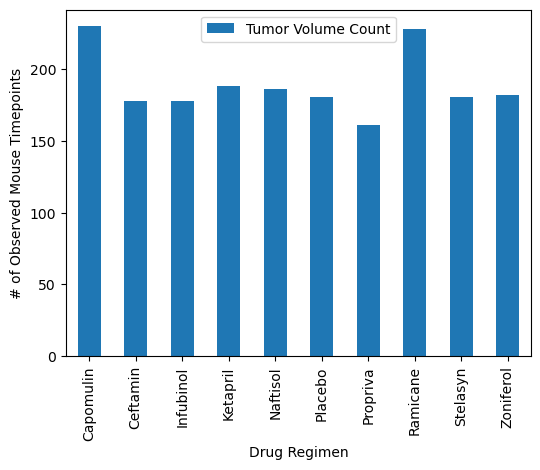

In [1520]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_df["Tumor Volume Count"] = drug_regimen_summary["Tumor Volume (mm3)"].count()
drug_regimen_chart = drug_regimen_df[["Tumor Volume Count"]]
drug_regimen_chart.plot(kind="bar", figsize=(6,4.5))
plt.ylabel("# of Observed Mouse Timepoints")
plt.xlabel("Drug Regimen")
plt.show()

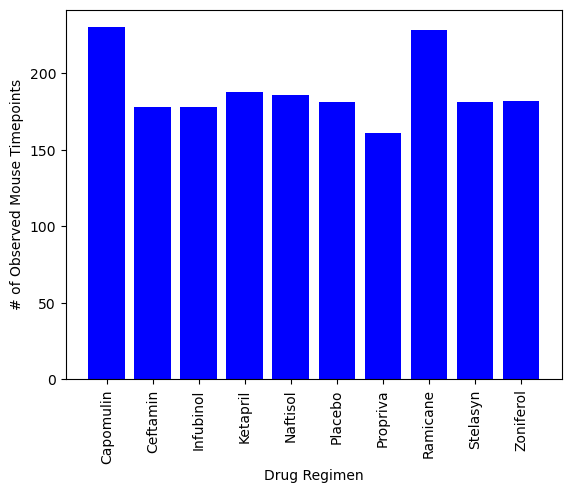

In [1521]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_reset_index = drug_regimen_df.rename_axis('Drug Regimen').reset_index()
test = drug_regimen_reset_index["Tumor Volume Count"]
x_axis = drug_regimen_reset_index["Drug Regimen"]
plt.bar(x_axis, test, color='blue')
plt.ylabel("# of Observed Mouse Timepoints")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.show()



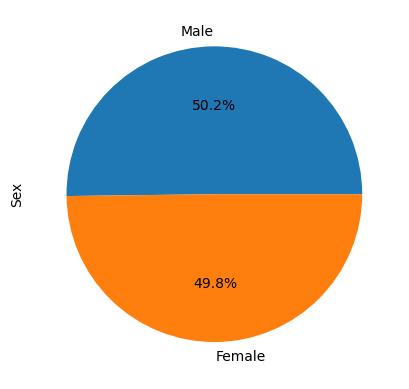

In [1522]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_vs_female = pd.DataFrame([mouse_merge_unique_df["Sex"].value_counts(),])
male_vs_female = male_vs_female.transpose()
plot = male_vs_female.plot.pie(y="Sex",autopct='%1.1f%%',legend=None)


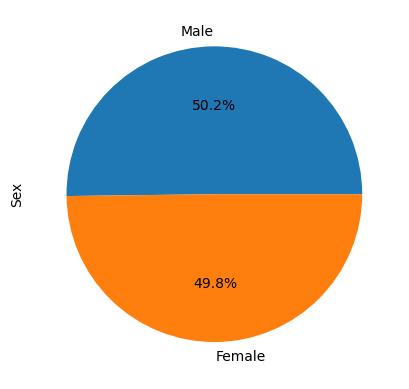

In [1523]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels for the sections of our pie chart
male_vs_female = male_vs_female.rename(columns={"Sex":"Sex Count"})
male_vs_female_new = male_vs_female.rename_axis('Sex').reset_index()
labels = male_vs_female_new["Sex"]

# The values of each section of the pie chart
sizes = male_vs_female_new["Sex Count"]
plt.pie(sizes,labels=labels,autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [1524]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

study_results_summary = study_results.groupby(["Mouse ID"])
study_results_df = pd.DataFrame([study_results_summary["Timepoint"].max()])
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
study_results_transpose = study_results_df.transpose()

merged_data = pd.merge(study_results_transpose, study_results, how="left", on=["Mouse ID", "Timepoint"])
merged_data = pd.merge(merged_data, mouse_metadata, how="left", on=["Mouse ID"])
merged_data = merged_data[["Mouse ID","Timepoint","Tumor Volume (mm3)","Drug Regimen"]]

In [1525]:
# Put treatments into a list for for loop (and later for plot labels)
box_plot_columns = merged_data[["Drug Regimen","Tumor Volume (mm3)"]]
blox_plot_group = box_plot_columns.groupby("Drug Regimen")
box_plot_array = pd.DataFrame(blox_plot_group["Tumor Volume (mm3)"].unique())
treatment_names = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_volume_data = []
box_plot_df = box_plot_array.rename_axis('Drug Regimen').reset_index()
box_plot_df
for value in box_plot_df["Drug Regimen"]:
    if value in treatment_names:
        df_values = box_plot_df.loc[box_plot_df["Drug Regimen"] == value]
        df_values = df_values.iat[0, 1]
        tumor_volume_data.append(df_values)
tumor_volume_data
# Determine if there are any potential outliers in the average occupancy in California
names = 0 
for x in tumor_volume_data:
    lowerq = np.quantile(x,.25)
    upperq = np.quantile(x,.75)
    iqr = upperq-lowerq

    quartile_range = treatment_names[names]
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"For {quartile_range} the values below {lower_bound} could be outliers.")
    print(f"For {quartile_range} the values above {upper_bound} could be outliers.")

    names = names + 1

For Capomulin the values below 20.70456164999999 could be outliers.
For Capomulin the values above 51.83201549 could be outliers.
For Ramicane the values below 42.727143235000014 could be outliers.
For Ramicane the values above 77.645584715 could be outliers.
For Infubinol the values below 36.83290494999999 could be outliers.
For Infubinol the values above 82.74144559000001 could be outliers.
For Ceftamin the values below 17.912664470000003 could be outliers.
For Ceftamin the values above 54.30681135 could be outliers.


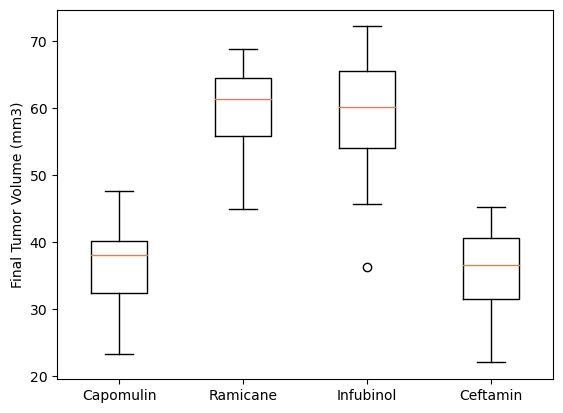

In [1526]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')

ax1.boxplot(tumor_volume_data)
plt.xticks([1, 2, 3,4], treatment_names)
plt.show()

## Line and Scatter Plots

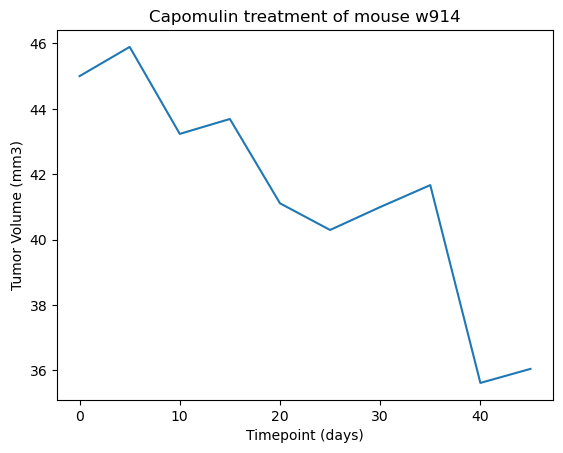

In [1527]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capmulin_df = mouse_merged_data[mouse_merged_data["Drug Regimen"] == "Capomulin"]
random_selection = capmulin_df.sample()
mouse_id_value = random_selection["Mouse ID"].values[0]

mouse_id_df = capmulin_df[capmulin_df["Mouse ID"] == mouse_id_value]

x_axis = mouse_id_df[["Timepoint"]]
y_axis = mouse_id_df[["Tumor Volume (mm3)"]]
plt.plot(x_axis, y_axis)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f'Capomulin treatment of mouse {mouse_id_value}')
plt.show()

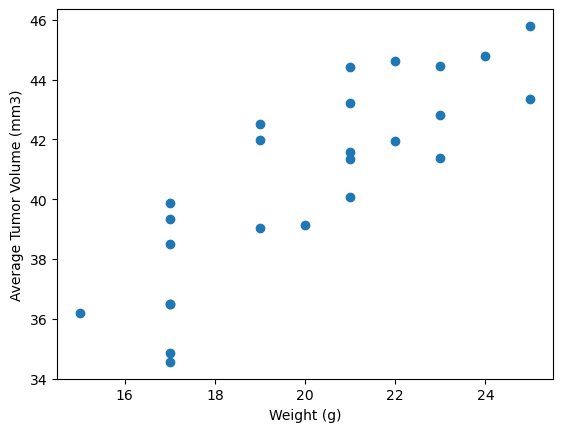

In [1579]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_tumor_volume = capmulin_df.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
mouse_weight = capmulin_df.groupby(["Mouse ID"])["Weight (g)"].unique()
avg_tumor_volume = avg_tumor_volume.to_frame()
mouse_weight = mouse_weight.to_frame()

y_axis = avg_tumor_volume[["Tumor Volume (mm3)"]]
x_axis = mouse_weight[["Weight (g)"]]

plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.scatter(x_axis,y_axis)
plt.show()



## Correlation and Regression

In [1529]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


In [1530]:
import pandas as pd
import numpy as np
technologies = {
    'Courses':["Spark","PySpark","Python","pandas"],
    'Fee' :[20000,25000,22000,30000],
    'Duration':['30days','40days','35days','50days'],
    'Discount':[1000,2300,1200,2000]
              }
index_labels=['r1','r2','r3','r4']
df = pd.DataFrame(technologies,index=index_labels)

df2=df.loc[df['Fee'] == 30000, 'Courses'].iloc[0]
df
print(df2)

pandas
